# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 39.6MB/s]


In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

###1

In [6]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
588,1,45.60,45.6,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
4639,41,24.85,962.25,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3381,15,85.60,1345.55,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),1
4312,59,19.30,1192.7,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
3887,1,45.05,45.05,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


###2

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

TotalSpent должен быть типа float64, а он - object, при попытке сменить тип была получена ошибка, так как он содержит ' ', поэтому я удалил все строки с этими значениям этого признака.

In [10]:
data = data.replace(' ', np.nan).dropna()
data['TotalSpent'] = data['TotalSpent'].astype('float64')
data["IsSeniorCitizen"] = data['IsSeniorCitizen'].astype('object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   object 
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [12]:
for col in feature_cols:
  print(col, data[col].isna().sum())

ClientPeriod 0
MonthlySpending 0
TotalSpent 0
Sex 0
IsSeniorCitizen 0
HasPartner 0
HasChild 0
HasPhoneService 0
HasMultiplePhoneNumbers 0
HasInternetService 0
HasOnlineSecurityService 0
HasOnlineBackup 0
HasDeviceProtection 0
HasTechSupportAccess 0
HasOnlineTV 0
HasMovieSubscription 0
HasContractPhone 0
IsBillingPaperless 0
PaymentMethod 0


## Анализ данных

###1

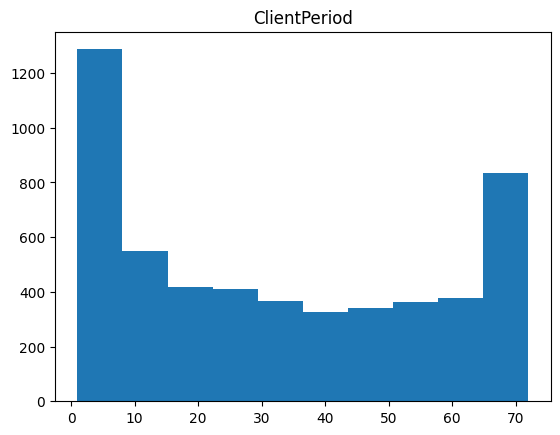

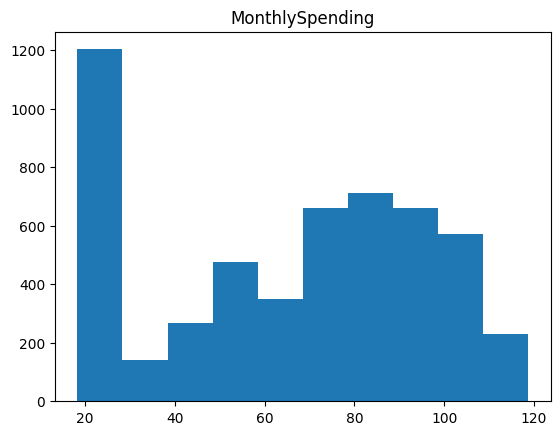

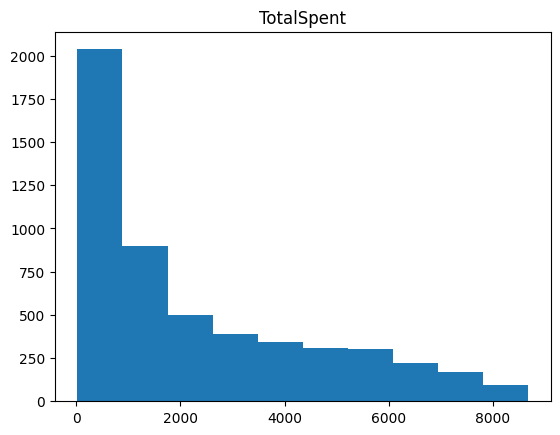

In [13]:
for col in num_cols:
  plt.hist(data[col])
  plt.title(col)
  plt.show()

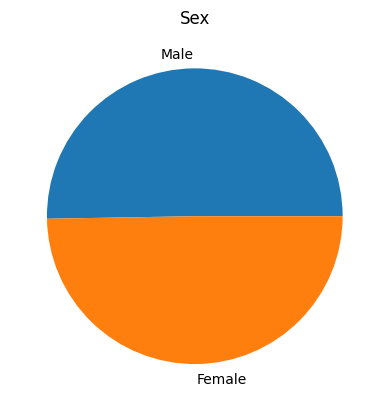

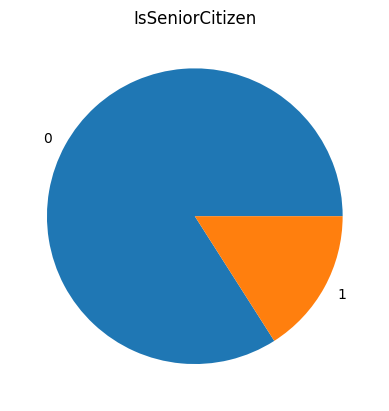

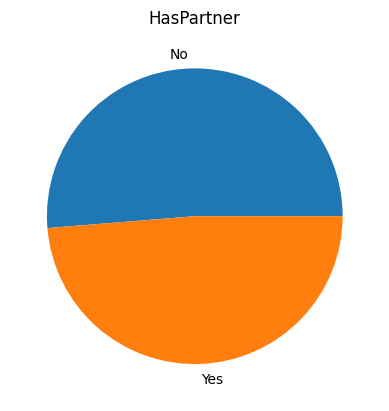

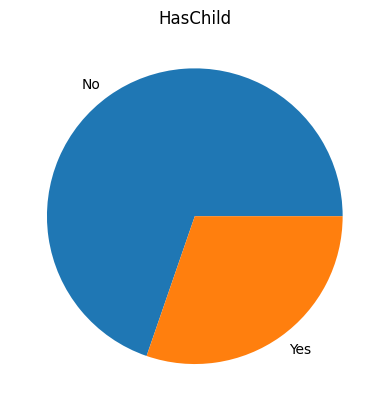

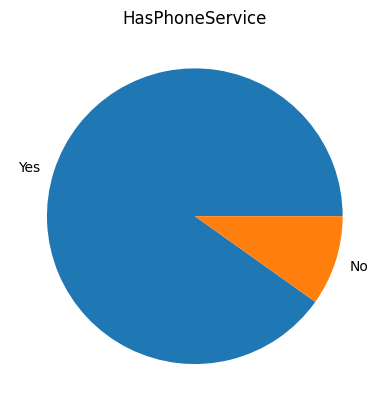

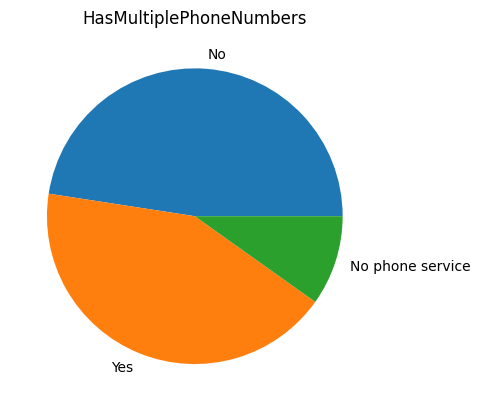

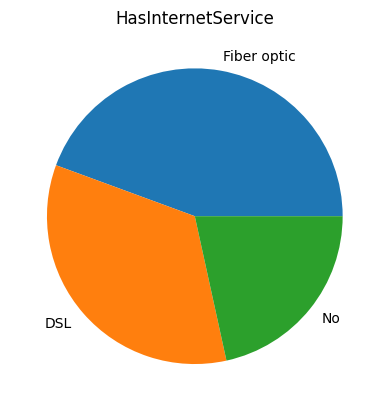

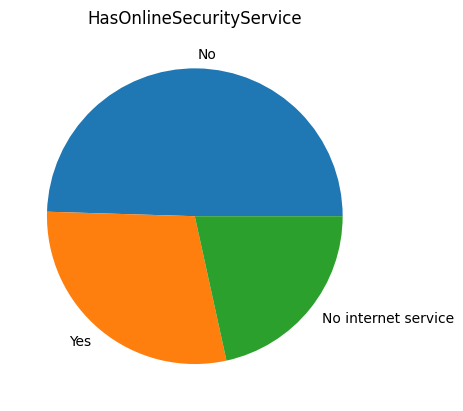

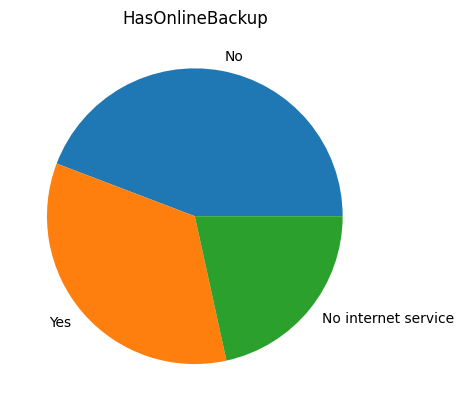

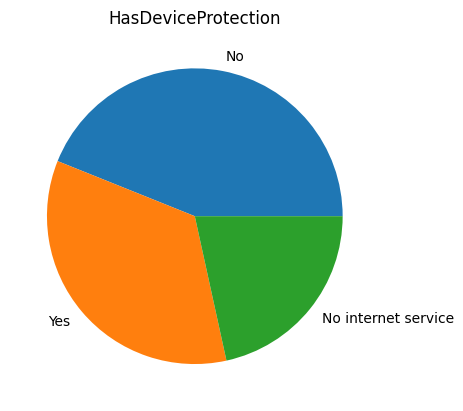

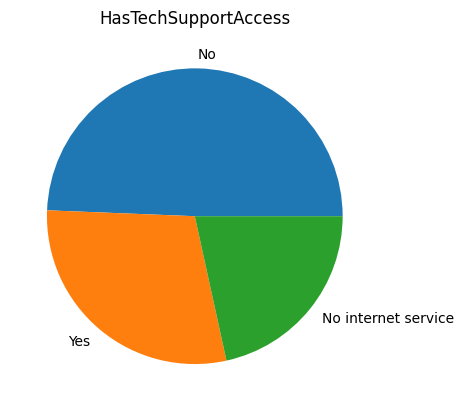

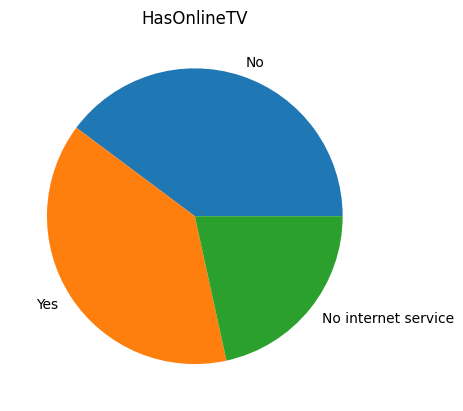

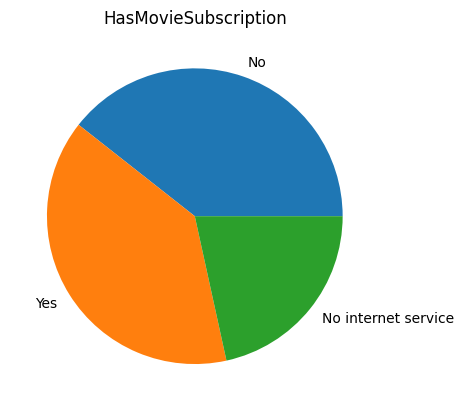

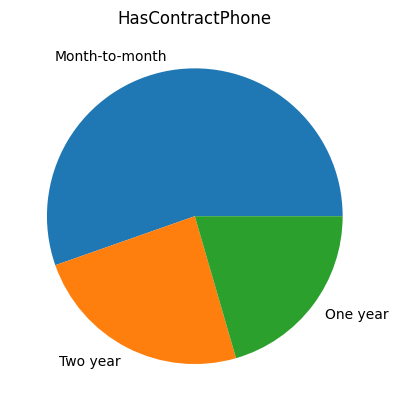

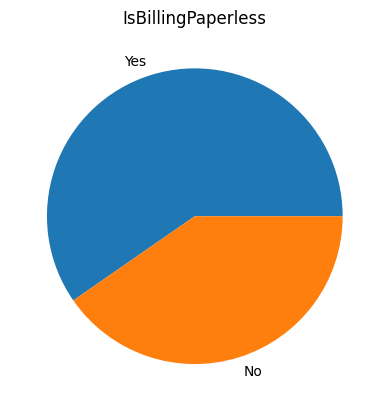

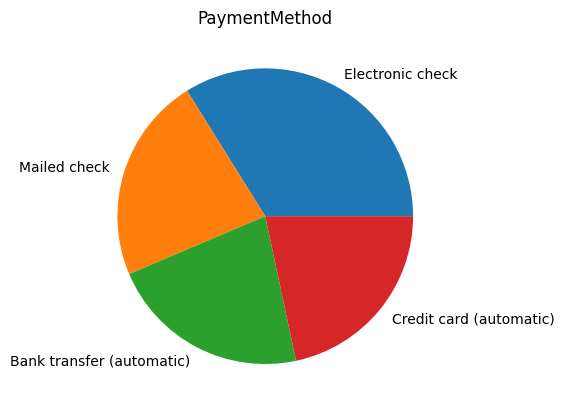

In [14]:
for col in cat_cols:
  plt.pie(data[col].value_counts(),labels = data[col].value_counts().index)
  plt.title(col)
  plt.show()

###2

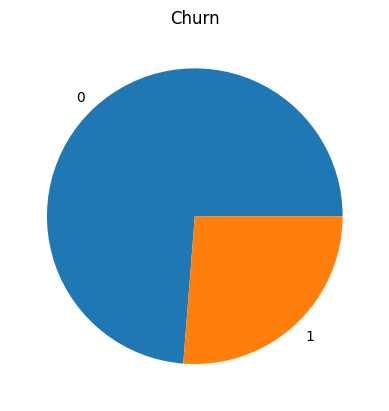

In [15]:
plt.pie(data[target_col].value_counts(),labels = data[target_col].value_counts().index)
plt.title(target_col)
plt.show()

По распределению целевой переменной можно сказать, что классы являются несбалансированными и объектов класса 0 больше, чем класса 1

## Применение линейных моделей

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
X = data[feature_cols]
y = data[target_col]

In [23]:
std_scaler = StandardScaler()
ohe_encoder = OneHotEncoder()

col_transformer = ColumnTransformer([('num_preproc', std_scaler, num_cols),
                                    ('cat_preproc', ohe_encoder, cat_cols)])

param = {'model__C' : np.arange(1, 100, 20)}
logistic = LogisticRegression()
clf = Pipeline([('preproc', col_transformer),
                      ('model', logistic)])

model = GridSearchCV(estimator=clf, param_grid=param, scoring='roc_auc', cv=5, n_jobs=-1, verbose=10, refit=True)


In [24]:
model.fit(X,y)
print(model.best_params_)
print(model.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'model__C': 41}
0.8448357736605336


В данном пункте, были созданы StandardScaler и OneHotEncoder и объеденены в один ColumnTransformer, чтобы применить их к нужным столбцам. Дальше создается модель, логистической регрессии. После этого создается Pipeline, где объединяются ColumnTransformer и модель. После этого подбирается параметр C с помощью GridSearchCV


Лучшее C = 41, результат - 0.8448357736605336



## Применение градиентного бустинга

In [25]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [42]:
import catboost
catboost_clf_std = catboost.CatBoostClassifier(cat_features=cat_cols)
X = data[feature_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=50)

In [43]:
catboost_clf_std.fit(X_train, y_train)

Learning rate set to 0.02003
0:	learn: 0.6808597	total: 13ms	remaining: 13s
1:	learn: 0.6684646	total: 28.6ms	remaining: 14.2s
2:	learn: 0.6565957	total: 44.2ms	remaining: 14.7s
3:	learn: 0.6486205	total: 51.9ms	remaining: 12.9s
4:	learn: 0.6363779	total: 66.2ms	remaining: 13.2s
5:	learn: 0.6261820	total: 76.8ms	remaining: 12.7s
6:	learn: 0.6162672	total: 93.1ms	remaining: 13.2s
7:	learn: 0.6063184	total: 108ms	remaining: 13.3s
8:	learn: 0.5975194	total: 121ms	remaining: 13.3s
9:	learn: 0.5891435	total: 135ms	remaining: 13.3s
10:	learn: 0.5809660	total: 149ms	remaining: 13.4s
11:	learn: 0.5741010	total: 159ms	remaining: 13.1s
12:	learn: 0.5669708	total: 175ms	remaining: 13.3s
13:	learn: 0.5598559	total: 187ms	remaining: 13.2s
14:	learn: 0.5534591	total: 205ms	remaining: 13.5s
15:	learn: 0.5469845	total: 219ms	remaining: 13.5s
16:	learn: 0.5406640	total: 233ms	remaining: 13.5s
17:	learn: 0.5357186	total: 244ms	remaining: 13.3s
18:	learn: 0.5300015	total: 258ms	remaining: 13.3s
19:	learn

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
y_pred = catboost_clf_std.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, y_pred)
print(score)

0.8465372844393131


In [46]:
catboost_clf = catboost.CatBoostClassifier(cat_features=cat_cols, n_estimators=1000, learning_rate=0.005, eval_metric='AUC')
catboost_clf.fit(X_train, y_train)
y_pred = catboost_clf.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, y_pred)
print(score)

0:	total: 13.7ms	remaining: 13.7s
1:	total: 29.5ms	remaining: 14.7s
2:	total: 47.9ms	remaining: 15.9s
3:	total: 67.6ms	remaining: 16.8s
4:	total: 78.2ms	remaining: 15.6s
5:	total: 90.1ms	remaining: 14.9s
6:	total: 98.2ms	remaining: 13.9s
7:	total: 110ms	remaining: 13.7s
8:	total: 125ms	remaining: 13.7s
9:	total: 139ms	remaining: 13.8s
10:	total: 153ms	remaining: 13.8s
11:	total: 166ms	remaining: 13.7s
12:	total: 180ms	remaining: 13.7s
13:	total: 194ms	remaining: 13.6s
14:	total: 204ms	remaining: 13.4s
15:	total: 222ms	remaining: 13.7s
16:	total: 234ms	remaining: 13.5s
17:	total: 248ms	remaining: 13.5s
18:	total: 262ms	remaining: 13.5s
19:	total: 277ms	remaining: 13.6s
20:	total: 282ms	remaining: 13.2s
21:	total: 288ms	remaining: 12.8s
22:	total: 302ms	remaining: 12.8s
23:	total: 309ms	remaining: 12.6s
24:	total: 321ms	remaining: 12.5s
25:	total: 334ms	remaining: 12.5s
26:	total: 349ms	remaining: 12.6s
27:	total: 362ms	remaining: 12.6s
28:	total: 375ms	remaining: 12.6s
29:	total: 389ms	

Был протестирован catboost со стандартными параметрами результат - 0.8465372844393131. Также лучшая комбинация параметров, которую я нашёл - n_estimators=1000, learning_rate=0.005 - результат - 0.8492312203346344

# Предсказания

In [47]:
best_model = catboost_clf

In [48]:
X_test = pd.read_csv('./test.csv')

In [49]:
X_test.loc[X_test['TotalSpent'] == ' ', 'TotalSpent'] = 0
X_test["IsSeniorCitizen"] = X_test['IsSeniorCitizen'].astype('object')
X_test['TotalSpent'] = X_test['TotalSpent'].astype('float64')
submission = pd.read_csv('./submission.csv')
submission = submission.set_index("Id")

In [50]:
submission['Churn'] = best_model.predict_proba(X_test)[:,1]# best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')